In [2]:
import pandas as pd
import re
import pickle
import matplotlib.pyplot as plt
import numpy as np
import numpy.matlib
import nest_asyncio
import nltk.corpus
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import jaccard_score
from sklearn.metrics.pairwise import cosine_similarity

<h1>Data Initialization</h1>
<h3>Append all 11 scrape results</h3>

In [40]:
#Read all 11 scrape
df1 = pd.read_csv('tokopedia_data.csv')
df2 = pd.read_csv('tokopedia_data_2.csv')
df3 = pd.read_csv('tokopedia_data_3.csv')
df4 = pd.read_csv('tokopedia_data_4.csv')
df5 = pd.read_csv('tokopedia_data_5.csv')
df6 = pd.read_csv('tokopedia_data_6.csv')
df7 = pd.read_csv('tokopedia_data_7.csv')
df8 = pd.read_csv('tokopedia_data_8.csv')
df9 = pd.read_csv('tokopedia_data_9.csv')
df10 = pd.read_csv('tokopedia_data_10.csv')
df11 = pd.read_csv('tokopedia_data_11.csv')

In [41]:
#Concatanate vertically
df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11], ignore_index=True, sort=False)

In [42]:
df_tokopedia = df.copy()
df_tokopedia

,product_name,rating,category,from_where,satisfaction_rate,img_link,description,amount_sold,original_price,product_price,five_star,four_star,three_star,two_star,one_star
0,Al-Quran Ash-Shahib ORI A5 - Merah,5,Buku,Jakarta Timur,99%,https://images.tokopedia.net/img/cache/500-squ...,PERHATIAN :- Semua buku di TOKO HARGA BUKU ORI...,Terjual 2 rb+,Rp75.000,Rp75.000,657,25,4,0,0
1,MASKER ANAK KF94 KOREA KIDS FACE MASK KF 94 AN...,4.9,Fashion Anak & Bayi,Jakarta Barat,99%,https://images.tokopedia.net/img/cache/500-squ...,MASKER EARLOOP KF94 ANAKSUDAH IZIN KEMENKES RI...,Terjual 10 rb+,Rp6.500,Rp5.000,1621,104,9,1,3
2,Otogard GOLD LINE Wiper Fluid Concentrate,4.9,Otomotif,Jakarta Selatan,97%,https://images.tokopedia.net/img/cache/500-squ...,- Cairan konsentrat yang berfungsi untuk membe...,Terjual 4 rb+,Rp72.000,Rp36.000,2339,145,34,4,24
3,Detick 1ml 2ml Obat Kutu Tetes Anjing Kucing 1...,4.9,Perawatan Hewan,Kab. Tangerang,98%,https://images.tokopedia.net/img/cache/500-squ...,DETICK 1ml 2ml Obat Kutu Tetes Anjing Kucing H...,Terjual 10 rb+,Rp24.000,Rp16.950,1161,76,15,1,6
4,Bebek Kloset Ekstra Kuat 450mL,4.8,Pertukangan,Gudang Terdekat,96%,https://images.tokopedia.net/img/cache/500-squ...,Bebek Kloset merupakan pembersih kloset yang m...,Terjual 5 rb+,Rp21.500,Rp18.920,1102,57,21,6,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5044,Safety Traffic Cone / Kerucut Lalu Lintas Tona...,5,Pertukangan,Kab. Tangerang,99%,https://images.tokopedia.net/img/cache/500-squ...,Ready Stock - Tonata Rubber Cone 1.8 KgsSpesif...,Terjual 10 rb+,Rp88.000,Rp88.000,1453,51,4,1,1
5045,PAKET COD (PENTING),5,Buku,Kab. Bandung Barat,100,https://images.tokopedia.net/img/cache/500-squ...,Untuk Info silahka Banyak produk yang bisa di...,Terjual 8 rb+,Rp1.000,Rp1.000,29,0,0,0,0
5046,Game Boy Retro FC 400 in 1 Gameboy Mini Gamepa...,4.8,Gaming,Kota Tangerang,95%,https://images.tokopedia.net/img/cache/500-squ...,Link Gameboy + Stick : https://www.tokopedia.c...,Terjual 10 rb+,Rp72.500,Rp72.500,1654,104,46,10,21
5047,SENDOK TEH ISI 12 PCS - STAINLESS STEEL,4.9,Dapur,Jakarta Barat,96%,https://images.tokopedia.net/img/cache/500-squ...,SENDOK TEH ISI 12 PCS Panjang 14cmSTAINLESS STEEL,Terjual 1 rb+,Rp8.000,Rp8.000,229,18,6,1,1


In [11]:
df_tokopedia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5029 entries, 0 to 5028
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_name          5029 non-null   object 
 1   rating                5029 non-null   float64
 2   category              5029 non-null   object 
 3   from_where            5029 non-null   object 
 4   satisfaction_rate     5029 non-null   object 
 5   img_link              5029 non-null   object 
 6   description           5029 non-null   object 
 7   amount_sold           5029 non-null   object 
 8   original_price        5029 non-null   object 
 9   product_price         5029 non-null   object 
 10  five_star             5029 non-null   object 
 11  four_star             5029 non-null   int64  
 12  three_star            5029 non-null   int64  
 13  two_star              5029 non-null   int64  
 14  one_star              5029 non-null   int64  
 15  cleaned_description  

In [53]:
df_tokopedia.drop_duplicates(subset=['product_name'], inplace=True)
df_tokopedia.duplicated(subset=['product_name']).sum()

0

<h1>Five_Star Fix</h1>

In [19]:
five_star_object = [x for x in df_tokopedia['five_star'].value_counts().index if 'rb' in x]
five_star_object

['10,2rb',
 '10,5rb',
 '10,9rb',
 '11,4rb',
 '12rb',
 '12,5rb',
 '10,3rb',
 '14,2rb',
 '13,7rb',
 '13,1rb',
 '12,4rb',
 '11rb',
 '10,1rb',
 '10,6rb',
 '43,1rb',
 '11,6rb',
 '13,2rb',
 '11,1rb',
 '14,3rb',
 '21,3rb',
 '10,7rb',
 '20,2rb',
 '40,8rb',
 '11,5rb',
 '35rb',
 '20,9rb',
 '17,3rb',
 '17,8rb',
 '66,9rb',
 '13rb',
 '22,1rb',
 '13,5rb',
 '16,3rb',
 '45,5rb',
 '19,3rb',
 '25,1rb',
 '13,6rb',
 '21,1rb',
 '19,8rb',
 '22,6rb',
 '36,9rb',
 '19,1rb',
 '46,2rb',
 '19,4rb',
 '28,3rb',
 '13,8rb',
 '12,6rb',
 '14,6rb',
 '19,2rb',
 '17,1rb',
 '28,5rb',
 '24,6rb',
 '16,5rb',
 '15,5rb',
 '23,4rb']

Here we can find a pattern in which rb can be changed to double 0s, and we replace any commas to empty character.

In [45]:
df_tokopedia['five_star_fix'] = df_tokopedia['five_star'].str.replace('rb','00')
df_tokopedia['five_star_fix'] = df_tokopedia['five_star_fix'].str.replace(',','')
df_tokopedia['five_star_fix']

0        657
1       1621
2       2339
3       1161
4       1102
        ... 
5024    1453
5025      29
5026    1654
5027     229
5028    1916
Name: five_star_fix, Length: 5029, dtype: object

In [48]:
df_tokopedia['five_star_fix'] = df_tokopedia['five_star_fix'].astype(str).astype(int)

<h1>Rating Fix</h1>

In [9]:
df_tokopedia['rating'].value_counts()

4.9    2533
5      1635
4.8     584
4.7     133
4.6      47
0        41
5.0      26
4.5      10
4         8
4.4       5
4.3       3
4.2       2
3.8       1
3.5       1
Name: rating, dtype: int64

In [10]:
df_tokopedia.loc[df_tokopedia['rating'] == 'No Rating', 'rating'] = '0'
display(df_tokopedia.iloc[[4045]]['rating'][4045])
df_tokopedia['rating'] = pd.to_numeric(df_tokopedia['rating'])

'5'

<h2>Satisfaction Rate Fix</h2>

In [190]:
df_tokopedia.loc[df_tokopedia['satisfaction_rate'] == '100', 'satisfaction_rate'] = '100%'
# display(df_tokopedia.iloc[[5045]]['satisfaction_rate'][5045])

'100%'

In [58]:
df_tokopedia['satisfaction_rate_int'] = df_tokopedia['satisfaction_rate'].str.replace('%','')
df_tokopedia['satisfaction_rate_int'] = df_tokopedia['satisfaction_rate_int'].str.replace('No Satisfaction Rate', '0')
df_tokopedia['satisfaction_rate_int'] = df_tokopedia['satisfaction_rate_int'].astype(str).astype(int)


display(df_tokopedia['satisfaction_rate_int'])

0        99
1        99
2        97
3        98
4        96
       ... 
5024     99
5025    100
5026     95
5027     96
5028     96
Name: satisfaction_rate_int, Length: 5029, dtype: int32

<h1>Total Reviewers</h1>

In [61]:
df_tokopedia['total_reviewers'] = df_tokopedia['five_star_fix'] + df_tokopedia['four_star'] + df_tokopedia['three_star'] + df_tokopedia['two_star'] + df_tokopedia['one_star']

In [62]:
df_tokopedia['total_reviewers']

0        686
1       1738
2       2546
3       1259
4       1203
        ... 
5024    1510
5025      29
5026    1835
5027     255
5028    2227
Name: total_reviewers, Length: 5029, dtype: int64

<h2>Product Score</h2>

In [65]:
df_tokopedia['product_score'] = df_tokopedia['total_reviewers'] * df_tokopedia['rating']

In [69]:
df_tokopedia['product_score'] = df_tokopedia['product_score'] / df_tokopedia['product_score'].max()

In [70]:
df_tokopedia['product_score']

0       0.009943
1       0.024687
2       0.036164
3       0.017883
4       0.016739
          ...   
5024    0.021886
5025    0.000420
5026    0.025533
5027    0.003622
5028    0.030987
Name: product_score, Length: 5029, dtype: float64

<h2>Review Ratios</h2>

In [103]:
df_tokopedia['five_star_ratio'] = df_tokopedia['five_star_fix'] / df_tokopedia['total_reviewers']

In [104]:
df_tokopedia['four_star_ratio'] = df_tokopedia['four_star'] / df_tokopedia['total_reviewers']

In [105]:
df_tokopedia['three_star_ratio'] = df_tokopedia['three_star'] / df_tokopedia['total_reviewers']

In [106]:
df_tokopedia['two_star_ratio'] = df_tokopedia['two_star'] / df_tokopedia['total_reviewers']

In [107]:
df_tokopedia['one_star_ratio'] = df_tokopedia['one_star'] / df_tokopedia['total_reviewers']

In [108]:
df_tokopedia

,product_name,rating,category,from_where,satisfaction_rate,img_link,description,amount_sold,original_price,product_price,...,product_tag,five_star_fix,satisfaction_rate_int,total_reviewers,product_score,five_star_ratio,four_star_ratio,three_star_ratio,two_star_ratio,one_star_ratio
0,Al-Quran Ash-Shahib ORI A5 - Merah,5.0,Buku,Jakarta Timur,99%,https://images.tokopedia.net/img/cache/500-squ...,PERHATIAN :- Semua buku di TOKO HARGA BUKU ORI...,Terjual 2 rb+,Rp75.000,Rp75.000,...,perhati buku toko harga buku original asli lan...,657,99,686,0.009943,0.957726,0.036443,0.005831,0.000000,0.000000
1,MASKER ANAK KF94 KOREA KIDS FACE MASK KF 94 AN...,4.9,Fashion Anak & Bayi,Jakarta Barat,99%,https://images.tokopedia.net/img/cache/500-squ...,MASKER EARLOOP KF94 ANAKSUDAH IZIN KEMENKES RI...,Terjual 10 rb+,Rp6.500,Rp5.000,...,masker earloop kf94 anaksudah izin kemenkes ri...,1621,99,1738,0.024687,0.932681,0.059839,0.005178,0.000575,0.001726
2,Otogard GOLD LINE Wiper Fluid Concentrate,4.9,Otomotif,Jakarta Selatan,97%,https://images.tokopedia.net/img/cache/500-squ...,- Cairan konsentrat yang berfungsi untuk membe...,Terjual 4 rb+,Rp72.000,Rp36.000,...,cair konsentrat fungsi bersih kaca noda kotor ...,2339,97,2546,0.036164,0.918696,0.056952,0.013354,0.001571,0.009427
3,Detick 1ml 2ml Obat Kutu Tetes Anjing Kucing 1...,4.9,Perawatan Hewan,Kab. Tangerang,98%,https://images.tokopedia.net/img/cache/500-squ...,DETICK 1ml 2ml Obat Kutu Tetes Anjing Kucing H...,Terjual 10 rb+,Rp24.000,Rp16.950,...,detick 1ml 2ml obat kutu tetes anjing kucing h...,1161,98,1259,0.017883,0.922160,0.060365,0.011914,0.000794,0.004766
4,Bebek Kloset Ekstra Kuat 450mL,4.8,Pertukangan,Gudang Terdekat,96%,https://images.tokopedia.net/img/cache/500-squ...,Bebek Kloset merupakan pembersih kloset yang m...,Terjual 5 rb+,Rp21.500,Rp18.920,...,bebek kloset bersih kloset kandung germinex bu...,1102,96,1203,0.016739,0.916043,0.047382,0.017456,0.004988,0.014131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5024,Safety Traffic Cone / Kerucut Lalu Lintas Tona...,5.0,Pertukangan,Kab. Tangerang,99%,https://images.tokopedia.net/img/cache/500-squ...,Ready Stock - Tonata Rubber Cone 1.8 KgsSpesif...,Terjual 10 rb+,Rp88.000,Rp88.000,...,ready stock tonata rubber cone 1 8 kgsspesifik...,1453,99,1510,0.021886,0.962252,0.033775,0.002649,0.000662,0.000662
5025,PAKET COD (PENTING),5.0,Buku,Kab. Bandung Barat,100%,https://images.tokopedia.net/img/cache/500-squ...,Untuk Info silahka Banyak produk yang bisa di...,Terjual 8 rb+,Rp1.000,Rp1.000,...,info silahka produk belipaket codkategori-buku...,29,100,29,0.000420,1.000000,0.000000,0.000000,0.000000,0.000000
5026,Game Boy Retro FC 400 in 1 Gameboy Mini Gamepa...,4.8,Gaming,Kota Tangerang,95%,https://images.tokopedia.net/img/cache/500-squ...,Link Gameboy + Stick : https://www.tokopedia.c...,Terjual 10 rb+,Rp72.500,Rp72.500,...,link gameboy stick stick nya 5 warna hitem mer...,1654,95,1835,0.025533,0.901362,0.056676,0.025068,0.005450,0.011444
5027,SENDOK TEH ISI 12 PCS - STAINLESS STEEL,4.9,Dapur,Jakarta Barat,96%,https://images.tokopedia.net/img/cache/500-squ...,SENDOK TEH ISI 12 PCS Panjang 14cmSTAINLESS STEEL,Terjual 1 rb+,Rp8.000,Rp8.000,...,sendok teh isi 12 pcs 14cmstainless steelsendo...,229,96,255,0.003622,0.898039,0.070588,0.023529,0.003922,0.003922


<h2>Description Pre-Processing</h2>

<b>Cleaning, Tokenizing, Removing Stop Words, Stemming the description</b>

In [45]:
df_tokopedia['cleaned_description'] = [str(x).lower() for x in df_tokopedia['description']]

In [46]:
df_tokopedia['cleaned_description'] = [re.sub(r"www.\S+", " ", str(x)) for x in df_tokopedia['cleaned_description']]
df_tokopedia['cleaned_description'] = [re.sub(r"http\S+", " ", str(x)) for x in df_tokopedia['cleaned_description']]
df_tokopedia['cleaned_description'] = [re.sub("[^a-zA-Z0-9]", " ", str(x)) for x in df_tokopedia['cleaned_description']]
df_tokopedia['cleaned_description'] = [re.sub("\s\s+", " ", str(x)) for x in df_tokopedia['cleaned_description']]

df_tokopedia[['description','cleaned_description']]

,description,cleaned_description
0,PERHATIAN :- Semua buku di TOKO HARGA BUKU ORI...,perhatian semua buku di toko harga buku origin...
1,MASKER EARLOOP KF94 ANAKSUDAH IZIN KEMENKES RI...,masker earloop kf94 anaksudah izin kemenkes ri...
2,- Cairan konsentrat yang berfungsi untuk membe...,cairan konsentrat yang berfungsi untuk member...
3,DETICK 1ml 2ml Obat Kutu Tetes Anjing Kucing H...,detick 1ml 2ml obat kutu tetes anjing kucing h...
4,Bebek Kloset merupakan pembersih kloset yang m...,bebek kloset merupakan pembersih kloset yang m...
...,...,...
5044,Ready Stock - Tonata Rubber Cone 1.8 KgsSpesif...,ready stock tonata rubber cone 1 8 kgsspesifik...
5045,Untuk Info silahka Banyak produk yang bisa di...,untuk info silahka banyak produk yang bisa di ...
5046,Link Gameboy + Stick : https://www.tokopedia.c...,link gameboy stick stick nya saja 5 warna hite...
5047,SENDOK TEH ISI 12 PCS Panjang 14cmSTAINLESS STEEL,sendok teh isi 12 pcs panjang 14cmstainless steel


In [47]:
df_tokopedia['cleaned_description'] = df_tokopedia.apply(lambda row: word_tokenize(row['cleaned_description']), axis=1)
df_tokopedia[['description', 'cleaned_description']]

,description,cleaned_description
0,PERHATIAN :- Semua buku di TOKO HARGA BUKU ORI...,"[perhatian, semua, buku, di, toko, harga, buku..."
1,MASKER EARLOOP KF94 ANAKSUDAH IZIN KEMENKES RI...,"[masker, earloop, kf94, anaksudah, izin, kemen..."
2,- Cairan konsentrat yang berfungsi untuk membe...,"[cairan, konsentrat, yang, berfungsi, untuk, m..."
3,DETICK 1ml 2ml Obat Kutu Tetes Anjing Kucing H...,"[detick, 1ml, 2ml, obat, kutu, tetes, anjing, ..."
4,Bebek Kloset merupakan pembersih kloset yang m...,"[bebek, kloset, merupakan, pembersih, kloset, ..."
...,...,...
5044,Ready Stock - Tonata Rubber Cone 1.8 KgsSpesif...,"[ready, stock, tonata, rubber, cone, 1, 8, kgs..."
5045,Untuk Info silahka Banyak produk yang bisa di...,"[untuk, info, silahka, banyak, produk, yang, b..."
5046,Link Gameboy + Stick : https://www.tokopedia.c...,"[link, gameboy, stick, stick, nya, saja, 5, wa..."
5047,SENDOK TEH ISI 12 PCS Panjang 14cmSTAINLESS STEEL,"[sendok, teh, isi, 12, pcs, panjang, 14cmstain..."


In [48]:
nltk.download('stopwords')
stop_words = set(stopwords.words("indonesian"))
df_tokopedia['cleaned_description'] = df_tokopedia['cleaned_description'].apply(lambda row: [word for word in row if word not in stop_words])
df_tokopedia[['description', 'cleaned_description']]

[nltk_data] Downloading package stopwords to C:\Users\Kenny
[nltk_data]     Jinhiro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,description,cleaned_description
0,PERHATIAN :- Semua buku di TOKO HARGA BUKU ORI...,"[perhatian, buku, toko, harga, buku, original,..."
1,MASKER EARLOOP KF94 ANAKSUDAH IZIN KEMENKES RI...,"[masker, earloop, kf94, anaksudah, izin, kemen..."
2,- Cairan konsentrat yang berfungsi untuk membe...,"[cairan, konsentrat, berfungsi, membersihan, k..."
3,DETICK 1ml 2ml Obat Kutu Tetes Anjing Kucing H...,"[detick, 1ml, 2ml, obat, kutu, tetes, anjing, ..."
4,Bebek Kloset merupakan pembersih kloset yang m...,"[bebek, kloset, pembersih, kloset, mengandung,..."
...,...,...
5044,Ready Stock - Tonata Rubber Cone 1.8 KgsSpesif...,"[ready, stock, tonata, rubber, cone, 1, 8, kgs..."
5045,Untuk Info silahka Banyak produk yang bisa di...,"[info, silahka, produk, beli]"
5046,Link Gameboy + Stick : https://www.tokopedia.c...,"[link, gameboy, stick, stick, nya, 5, warna, h..."
5047,SENDOK TEH ISI 12 PCS Panjang 14cmSTAINLESS STEEL,"[sendok, teh, isi, 12, pcs, 14cmstainless, steel]"


In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()
df_tokopedia['cleaned_description'] = df_tokopedia['cleaned_description'].apply(lambda row: stemmer.stem(' '.join(word for word in row)).split())
df_tokopedia[['description', 'cleaned_description']]

<h1>Title Pre-Processing</h1>

In [ ]:
df_tokopedia['cleaned_product_name'] = [str(x).lower() for x in df_tokopedia['product_name']]

In [ ]:
df_tokopedia['cleaned_product_name'] = [re.sub(r"www.\S+", " ", str(x)) for x in df_tokopedia['cleaned_product_name']]
df_tokopedia['cleaned_product_name'] = [re.sub(r"http\S+", " ", str(x)) for x in df_tokopedia['cleaned_product_name']]
df_tokopedia['cleaned_product_name'] = [re.sub("[^a-zA-Z0-9]", " ", str(x)) for x in df_tokopedia['cleaned_product_name']]
df_tokopedia['cleaned_product_name'] = [re.sub("\s\s+", " ", str(x)) for x in df_tokopedia['cleaned_product_name']]

df_tokopedia[['product_name','cleaned_product_name']]

In [ ]:
df_tokopedia['cleaned_product_name'] = df_tokopedia.apply(lambda row: word_tokenize(row['cleaned_product_name']), axis=1)
df_tokopedia[['product_name', 'cleaned_product_name']]

In [ ]:
df_tokopedia['cleaned_product_name'] = df_tokopedia['cleaned_product_name'].apply(lambda row: [word for word in row if word not in stop_words])
df_tokopedia[['product_name', 'cleaned_product_name']]

In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()
df_tokopedia['cleaned_product_name'] = df_tokopedia['cleaned_product_name'].apply(lambda row: stemmer.stem(' '.join(word for word in row)).split())
df_tokopedia[['product_name', 'cleaned_product_name']]

<h2>Category Pre-processing</h2>

In [147]:
df_tokopedia['category']

0                      Buku
1       Fashion Anak & Bayi
2                  Otomotif
3           Perawatan Hewan
4               Pertukangan
               ...         
5044            Pertukangan
5045                   Buku
5046                 Gaming
5047                  Dapur
5048                 Gaming
Name: category, Length: 5029, dtype: object

In [174]:
df_tokopedia['tagged_category'] = 'kategori-'+df_tokopedia['category'].str.lower()

In [175]:
df_tokopedia['tagged_category'] = df_tokopedia['tagged_category'].str.replace(' ', '')

In [176]:
df_tokopedia['tagged_category'] = df_tokopedia['tagged_category'].str.replace('&', '-')
df_tokopedia['tagged_category']

0                   kategori-buku
1       kategori-fashionanak-bayi
2               kategori-otomotif
3         kategori-perawatanhewan
4            kategori-pertukangan
                  ...            
5044         kategori-pertukangan
5045                kategori-buku
5046              kategori-gaming
5047               kategori-dapur
5048              kategori-gaming
Name: tagged_category, Length: 5049, dtype: object

In [116]:
df_tokopedia

,product_name,rating,category,from_where,satisfaction_rate,img_link,description,amount_sold,original_price,product_price,...,product_tag,five_star_fix,satisfaction_rate_int,total_reviewers,product_score,five_star_ratio,four_star_ratio,three_star_ratio,two_star_ratio,one_star_ratio
0,Al-Quran Ash-Shahib ORI A5 - Merah,5.0,Buku,Jakarta Timur,99%,https://images.tokopedia.net/img/cache/500-squ...,PERHATIAN :- Semua buku di TOKO HARGA BUKU ORI...,Terjual 2 rb+,Rp75.000,Rp75.000,...,perhati buku toko harga buku original asli lan...,657,99,686,0.009943,0.957726,0.036443,0.005831,0.000000,0.000000
1,MASKER ANAK KF94 KOREA KIDS FACE MASK KF 94 AN...,4.9,Fashion Anak & Bayi,Jakarta Barat,99%,https://images.tokopedia.net/img/cache/500-squ...,MASKER EARLOOP KF94 ANAKSUDAH IZIN KEMENKES RI...,Terjual 10 rb+,Rp6.500,Rp5.000,...,masker earloop kf94 anaksudah izin kemenkes ri...,1621,99,1738,0.024687,0.932681,0.059839,0.005178,0.000575,0.001726
2,Otogard GOLD LINE Wiper Fluid Concentrate,4.9,Otomotif,Jakarta Selatan,97%,https://images.tokopedia.net/img/cache/500-squ...,- Cairan konsentrat yang berfungsi untuk membe...,Terjual 4 rb+,Rp72.000,Rp36.000,...,cair konsentrat fungsi bersih kaca noda kotor ...,2339,97,2546,0.036164,0.918696,0.056952,0.013354,0.001571,0.009427
3,Detick 1ml 2ml Obat Kutu Tetes Anjing Kucing 1...,4.9,Perawatan Hewan,Kab. Tangerang,98%,https://images.tokopedia.net/img/cache/500-squ...,DETICK 1ml 2ml Obat Kutu Tetes Anjing Kucing H...,Terjual 10 rb+,Rp24.000,Rp16.950,...,detick 1ml 2ml obat kutu tetes anjing kucing h...,1161,98,1259,0.017883,0.922160,0.060365,0.011914,0.000794,0.004766
4,Bebek Kloset Ekstra Kuat 450mL,4.8,Pertukangan,Gudang Terdekat,96%,https://images.tokopedia.net/img/cache/500-squ...,Bebek Kloset merupakan pembersih kloset yang m...,Terjual 5 rb+,Rp21.500,Rp18.920,...,bebek kloset bersih kloset kandung germinex bu...,1102,96,1203,0.016739,0.916043,0.047382,0.017456,0.004988,0.014131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5024,Safety Traffic Cone / Kerucut Lalu Lintas Tona...,5.0,Pertukangan,Kab. Tangerang,99%,https://images.tokopedia.net/img/cache/500-squ...,Ready Stock - Tonata Rubber Cone 1.8 KgsSpesif...,Terjual 10 rb+,Rp88.000,Rp88.000,...,ready stock tonata rubber cone 1 8 kgsspesifik...,1453,99,1510,0.021886,0.962252,0.033775,0.002649,0.000662,0.000662
5025,PAKET COD (PENTING),5.0,Buku,Kab. Bandung Barat,100%,https://images.tokopedia.net/img/cache/500-squ...,Untuk Info silahka Banyak produk yang bisa di...,Terjual 8 rb+,Rp1.000,Rp1.000,...,info silahka produk belipaket codkategori-buku...,29,100,29,0.000420,1.000000,0.000000,0.000000,0.000000,0.000000
5026,Game Boy Retro FC 400 in 1 Gameboy Mini Gamepa...,4.8,Gaming,Kota Tangerang,95%,https://images.tokopedia.net/img/cache/500-squ...,Link Gameboy + Stick : https://www.tokopedia.c...,Terjual 10 rb+,Rp72.500,Rp72.500,...,link gameboy stick stick nya 5 warna hitem mer...,1654,95,1835,0.025533,0.901362,0.056676,0.025068,0.005450,0.011444
5027,SENDOK TEH ISI 12 PCS - STAINLESS STEEL,4.9,Dapur,Jakarta Barat,96%,https://images.tokopedia.net/img/cache/500-squ...,SENDOK TEH ISI 12 PCS Panjang 14cmSTAINLESS STEEL,Terjual 1 rb+,Rp8.000,Rp8.000,...,sendok teh isi 12 pcs 14cmstainless steelsendo...,229,96,255,0.003622,0.898039,0.070588,0.023529,0.003922,0.003922


<h2>From_where Pre-Processing</h2>

In [198]:
df_tokopedia['tagged_location'] = 'lokasi-'+df_tokopedia['from_where'].str.lower()

In [199]:
df_tokopedia['tagged_location'] = df_tokopedia['tagged_location'].str.replace(' ', '')

In [200]:
df_tokopedia['tagged_location']

0           lokasi-jakartatimur
1           lokasi-jakartabarat
2         lokasi-jakartaselatan
3          lokasi-kab.tangerang
4         lokasi-gudangterdekat
                 ...           
5044       lokasi-kab.tangerang
5045    lokasi-kab.bandungbarat
5046       lokasi-kotatangerang
5047        lokasi-jakartabarat
5048          lokasi-kotabekasi
Name: tagged_location, Length: 5049, dtype: object

<h2>Finalizing list to string</h2>

In [ ]:
df_tokopedia['cleaned_product_name'] = df_tokopedia['cleaned_product_name'].apply(eval).apply(' '.join)
df_tokopedia['cleaned_description'] = df_tokopedia['cleaned_description'].apply(eval).apply(' '.join)

In [106]:
df_tokopedia['product_tag'] = df_tokopedia['cleaned_description'] + ' ' + df_tokopedia['cleaned_product_name'] + ' ' + df_tokopedia['tagged_category'] + ' ' + df_tokopedia['tagged_location']
df_tokopedia

,product_name,rating,category,from_where,satisfaction_rate,img_link,description,amount_sold,original_price,product_price,...,product_tag,five_star_fix,satisfaction_rate_int,total_reviewers,product_score,five_star_ratio,four_star_ratio,three_star_ratio,two_star_ratio,one_star_ratio
0,Al-Quran Ash-Shahib ORI A5 - Merah,5.0,Buku,Jakarta Timur,99%,https://images.tokopedia.net/img/cache/500-squ...,PERHATIAN :- Semua buku di TOKO HARGA BUKU ORI...,Terjual 2 rb+,Rp75.000,Rp75.000,...,perhati buku toko harga buku original asli lan...,657,99,686,0.009943,0.957726,0.036443,0.005831,0.000000,0.000000
1,MASKER ANAK KF94 KOREA KIDS FACE MASK KF 94 AN...,4.9,Fashion Anak & Bayi,Jakarta Barat,99%,https://images.tokopedia.net/img/cache/500-squ...,MASKER EARLOOP KF94 ANAKSUDAH IZIN KEMENKES RI...,Terjual 10 rb+,Rp6.500,Rp5.000,...,masker earloop kf94 anaksudah izin kemenkes ri...,1621,99,1738,0.024687,0.932681,0.059839,0.005178,0.000575,0.001726
2,Otogard GOLD LINE Wiper Fluid Concentrate,4.9,Otomotif,Jakarta Selatan,97%,https://images.tokopedia.net/img/cache/500-squ...,- Cairan konsentrat yang berfungsi untuk membe...,Terjual 4 rb+,Rp72.000,Rp36.000,...,cair konsentrat fungsi bersih kaca noda kotor ...,2339,97,2546,0.036164,0.918696,0.056952,0.013354,0.001571,0.009427
3,Detick 1ml 2ml Obat Kutu Tetes Anjing Kucing 1...,4.9,Perawatan Hewan,Kab. Tangerang,98%,https://images.tokopedia.net/img/cache/500-squ...,DETICK 1ml 2ml Obat Kutu Tetes Anjing Kucing H...,Terjual 10 rb+,Rp24.000,Rp16.950,...,detick 1ml 2ml obat kutu tetes anjing kucing h...,1161,98,1259,0.017883,0.922160,0.060365,0.011914,0.000794,0.004766
4,Bebek Kloset Ekstra Kuat 450mL,4.8,Pertukangan,Gudang Terdekat,96%,https://images.tokopedia.net/img/cache/500-squ...,Bebek Kloset merupakan pembersih kloset yang m...,Terjual 5 rb+,Rp21.500,Rp18.920,...,bebek kloset bersih kloset kandung germinex bu...,1102,96,1203,0.016739,0.916043,0.047382,0.017456,0.004988,0.014131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5024,Safety Traffic Cone / Kerucut Lalu Lintas Tona...,5.0,Pertukangan,Kab. Tangerang,99%,https://images.tokopedia.net/img/cache/500-squ...,Ready Stock - Tonata Rubber Cone 1.8 KgsSpesif...,Terjual 10 rb+,Rp88.000,Rp88.000,...,ready stock tonata rubber cone 1 8 kgsspesifik...,1453,99,1510,0.021886,0.962252,0.033775,0.002649,0.000662,0.000662
5025,PAKET COD (PENTING),5.0,Buku,Kab. Bandung Barat,100%,https://images.tokopedia.net/img/cache/500-squ...,Untuk Info silahka Banyak produk yang bisa di...,Terjual 8 rb+,Rp1.000,Rp1.000,...,info silahka produk beli paket cod kategori-bu...,29,100,29,0.000420,1.000000,0.000000,0.000000,0.000000,0.000000
5026,Game Boy Retro FC 400 in 1 Gameboy Mini Gamepa...,4.8,Gaming,Kota Tangerang,95%,https://images.tokopedia.net/img/cache/500-squ...,Link Gameboy + Stick : https://www.tokopedia.c...,Terjual 10 rb+,Rp72.500,Rp72.500,...,link gameboy stick stick nya 5 warna hitem mer...,1654,95,1835,0.025533,0.901362,0.056676,0.025068,0.005450,0.011444
5027,SENDOK TEH ISI 12 PCS - STAINLESS STEEL,4.9,Dapur,Jakarta Barat,96%,https://images.tokopedia.net/img/cache/500-squ...,SENDOK TEH ISI 12 PCS Panjang 14cmSTAINLESS STEEL,Terjual 1 rb+,Rp8.000,Rp8.000,...,sendok teh isi 12 pcs 14cmstainless steel send...,229,96,255,0.003622,0.898039,0.070588,0.023529,0.003922,0.003922


In [12]:
df_tokopedia.to_csv('df_tokopedia_clean.csv', index=False)

<h1>EDA</h1>

In [75]:
df_tokopedia.describe()

,rating,four_star,three_star,two_star,one_star,five_star_fix,satisfaction_rate_int,total_reviewers,product_score
count,5029.000000,5029.000000,5029.000000,5029.000000,5029.000000,5029.000000,5029.000000,5029.000000,5029.000000
mean,4.869517,65.269636,15.256512,3.360509,5.685027,1278.970372,96.800358,1368.542056,0.019465
std,0.451792,155.543274,39.141984,9.945830,16.840984,2760.143016,10.059504,2941.754931,0.041834
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.900000,6.000000,1.000000,0.000000,0.000000,173.000000,97.000000,184.000000,0.002628
50%,4.900000,24.000000,4.000000,1.000000,1.000000,536.000000,98.000000,574.000000,0.008153
75%,5.000000,65.000000,14.000000,3.000000,5.000000,1343.000000,99.000000,1452.000000,0.020668
max,5.000000,3427.000000,988.000000,288.000000,383.000000,66900.000000,100.000000,70402.000000,1.000000


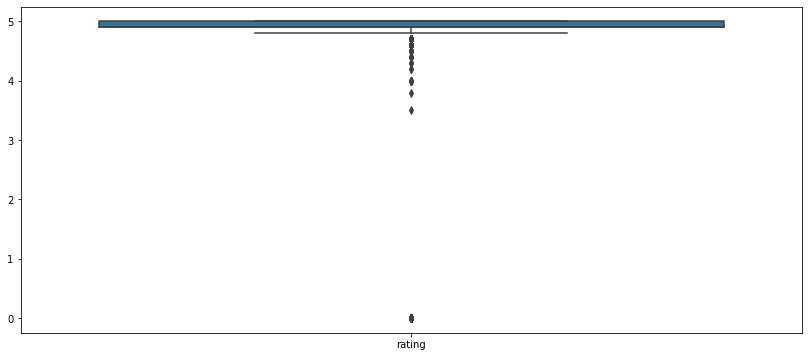

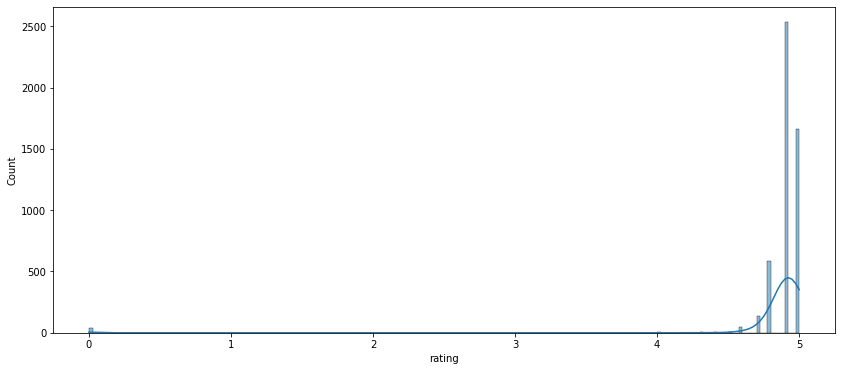

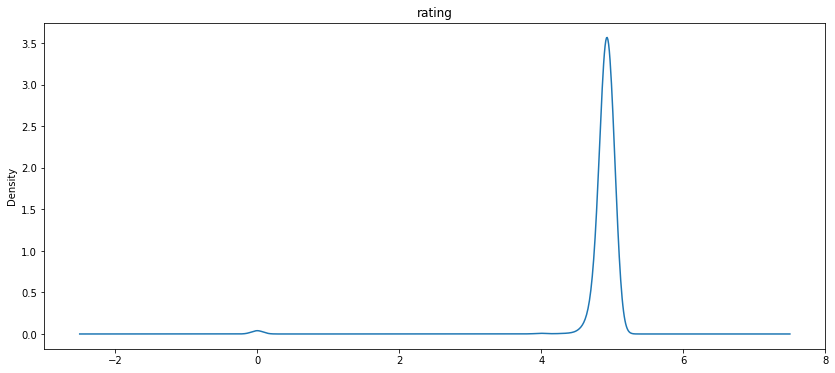

In [18]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.boxplot(data=df_tokopedia.loc[:,['rating']]).plot(ax=ax)
plt.show()

fig, ax = plt.subplots(figsize=(14, 6))
sns.histplot(data=df_tokopedia, x='rating',bins=200, kde=True).plot(ax=ax)
plt.show()

df_tokopedia['rating'].plot(title='rating', kind='density', figsize=(14,6))
plt.show()

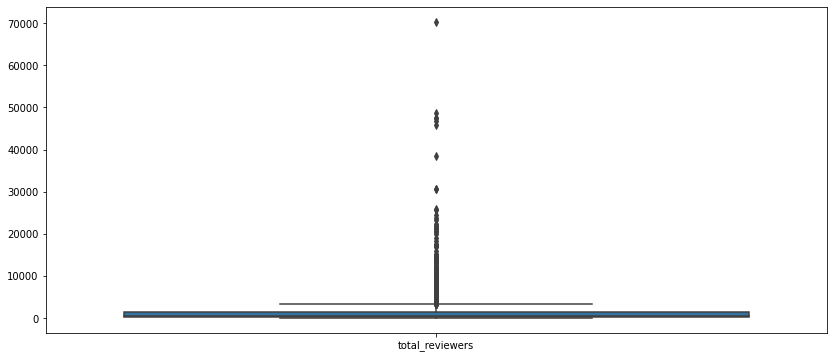

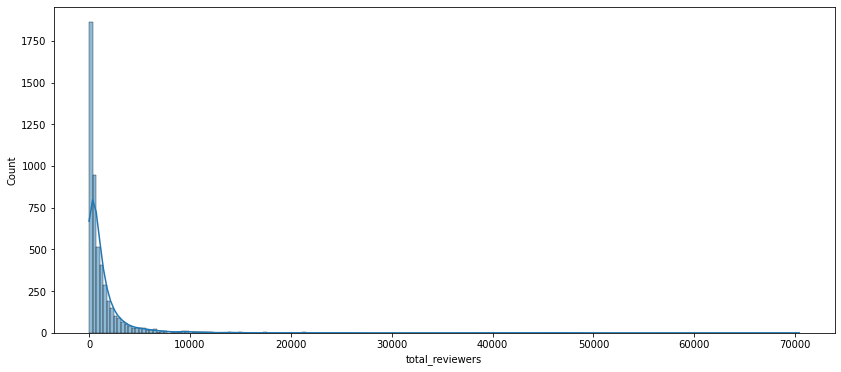

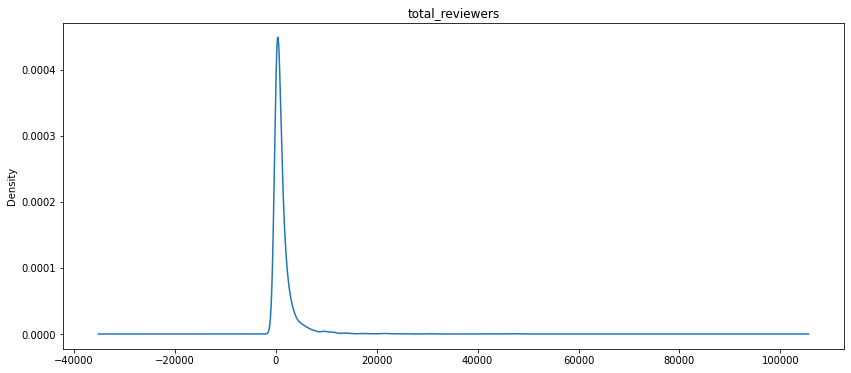

In [99]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.boxplot(data=df_tokopedia.loc[:,['total_reviewers']]).plot(ax=ax)
plt.show()

fig, ax = plt.subplots(figsize=(14, 6))
sns.histplot(data=df_tokopedia, x='total_reviewers',bins=200, kde=True).plot(ax=ax)
plt.show()

df_tokopedia['total_reviewers'].plot(title='total_reviewers', kind='density', figsize=(14,6))
plt.show()

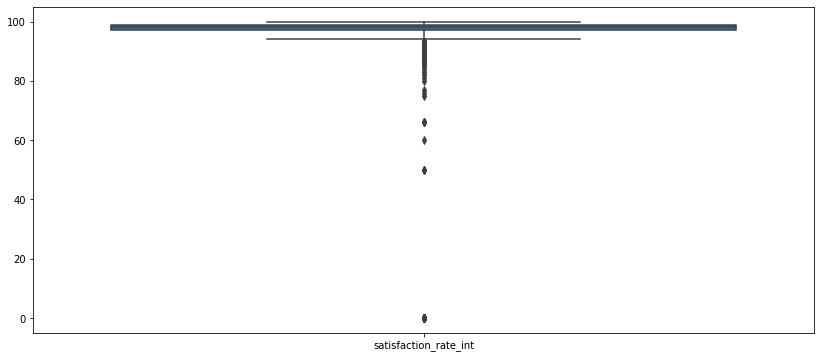

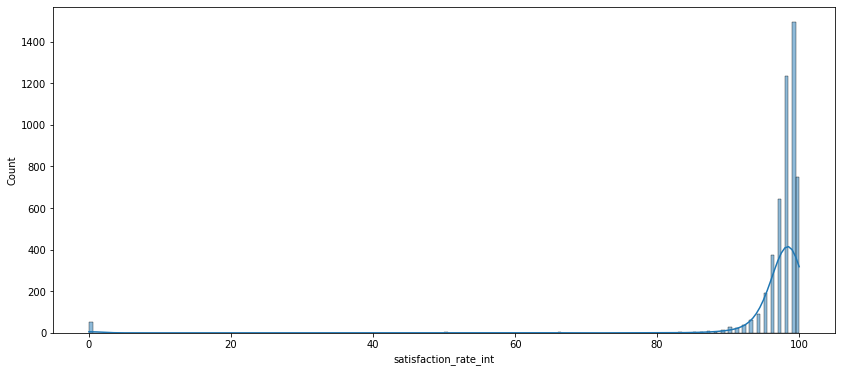

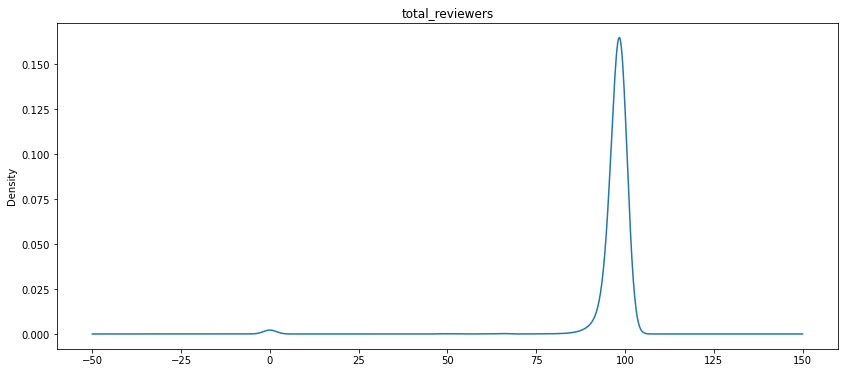

In [98]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.boxplot(data=df_tokopedia.loc[:,['satisfaction_rate_int']]).plot(ax=ax)
plt.show()

fig, ax = plt.subplots(figsize=(14, 6))
sns.histplot(data=df_tokopedia, x='satisfaction_rate_int',bins=200, kde=True).plot(ax=ax)
plt.show()

df_tokopedia['satisfaction_rate_int'].plot(title='total_reviewers', kind='density', figsize=(14,6))
plt.show()

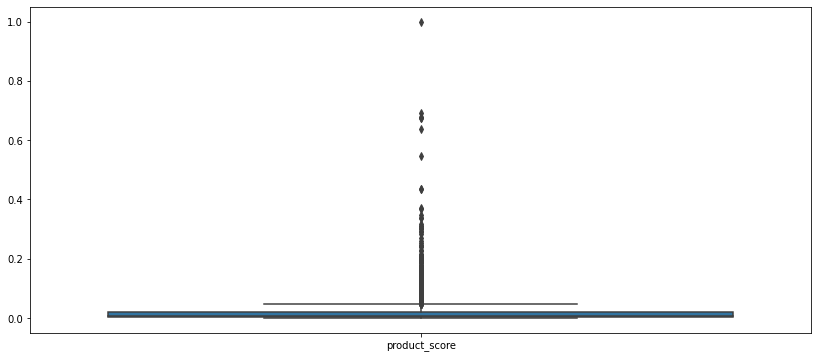

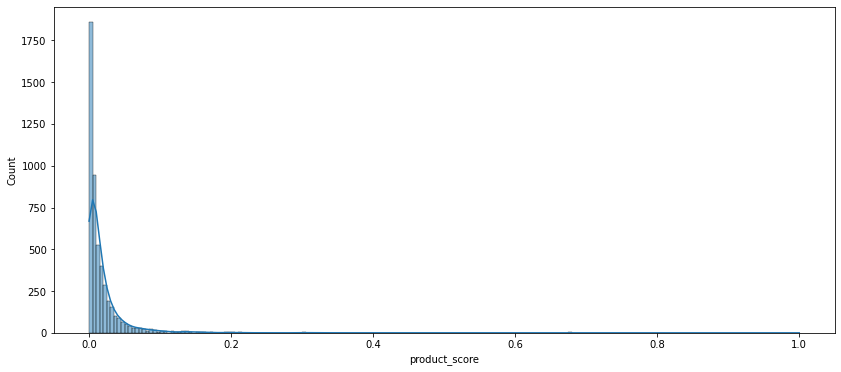

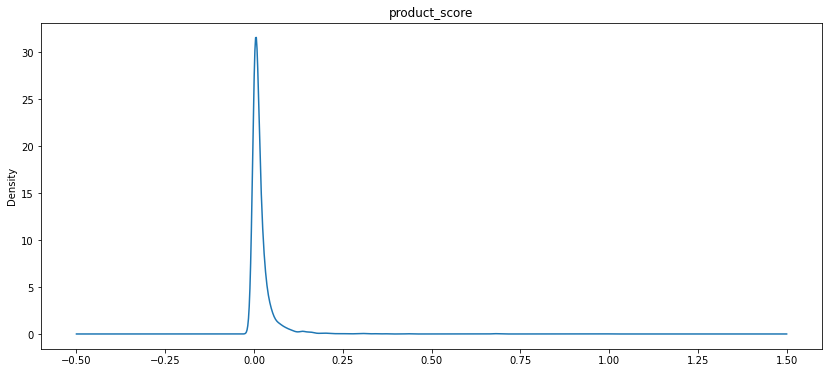

In [119]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.boxplot(data=df_tokopedia.loc[:,['product_score']]).plot(ax=ax)
plt.show()

fig, ax = plt.subplots(figsize=(14, 6))
sns.histplot(data=df_tokopedia, x='product_score',bins=200, kde=True).plot(ax=ax)
plt.show()

df_tokopedia['product_score'].plot(title='product_score', kind='density', figsize=(14,6))
plt.show()

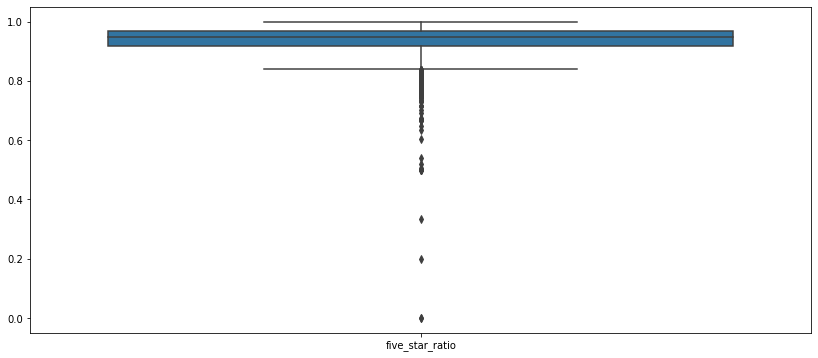

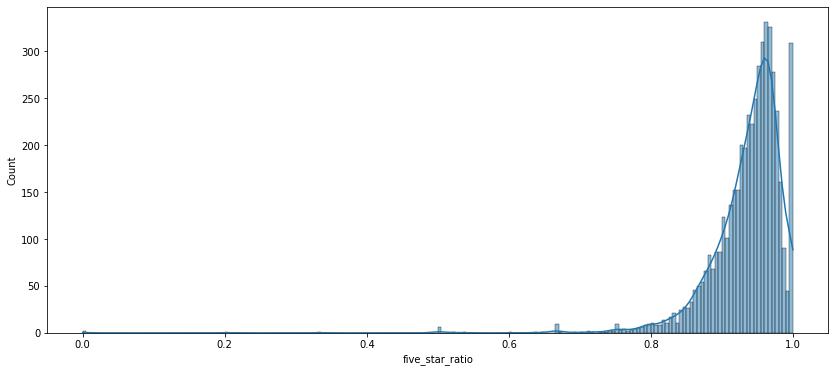

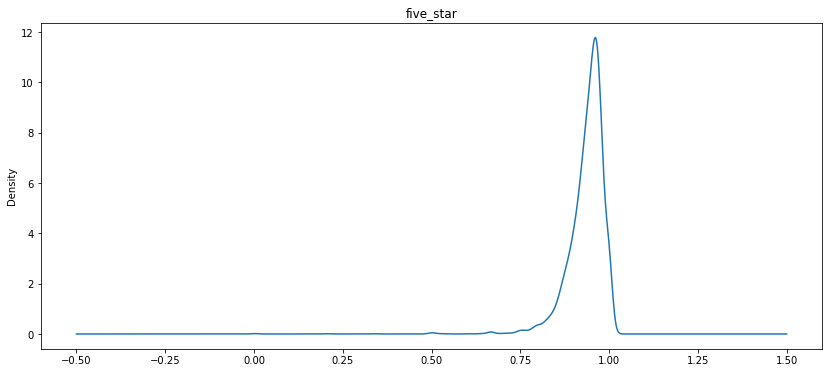

In [111]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.boxplot(data=df_tokopedia.loc[:,['five_star_ratio']]).plot(ax=ax)
plt.show()

fig, ax = plt.subplots(figsize=(14, 6))
sns.histplot(data=df_tokopedia, x='five_star_ratio',bins=200, kde=True).plot(ax=ax)
plt.show()

df_tokopedia['five_star_ratio'].plot(title='five_star', kind='density', figsize=(14,6))
plt.show()

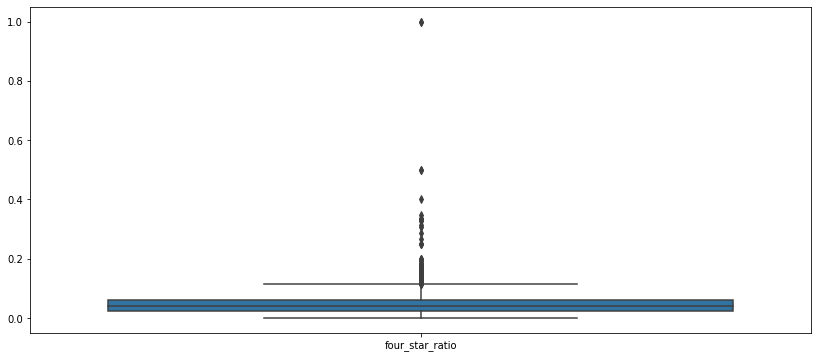

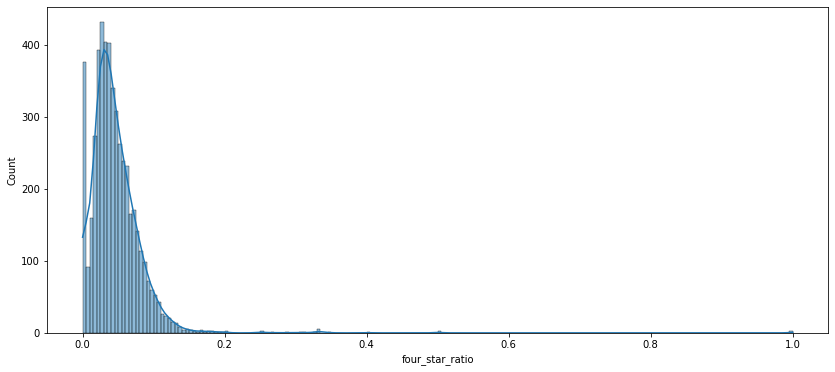

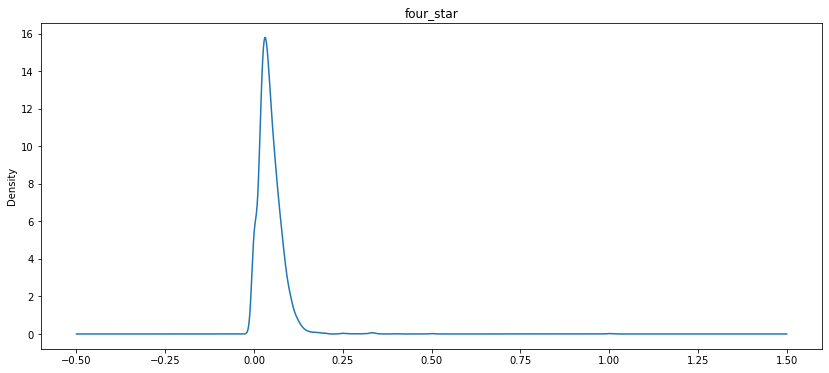

In [112]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.boxplot(data=df_tokopedia.loc[:,['four_star_ratio']]).plot(ax=ax)
plt.show()

fig, ax = plt.subplots(figsize=(14, 6))
sns.histplot(data=df_tokopedia, x='four_star_ratio',bins=200, kde=True).plot(ax=ax)
plt.show()

df_tokopedia['four_star_ratio'].plot(title='four_star', kind='density', figsize=(14,6))
plt.show()

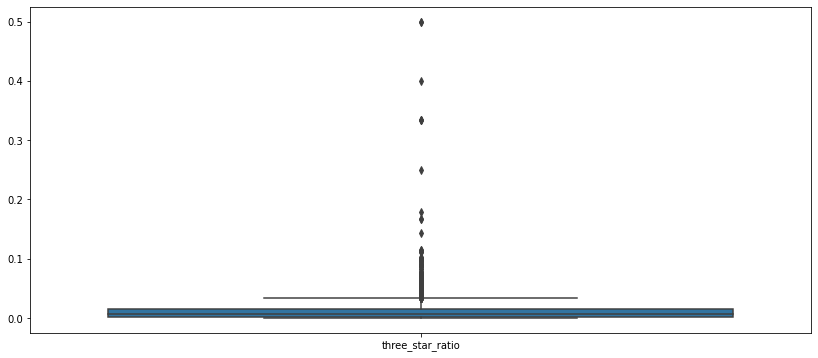

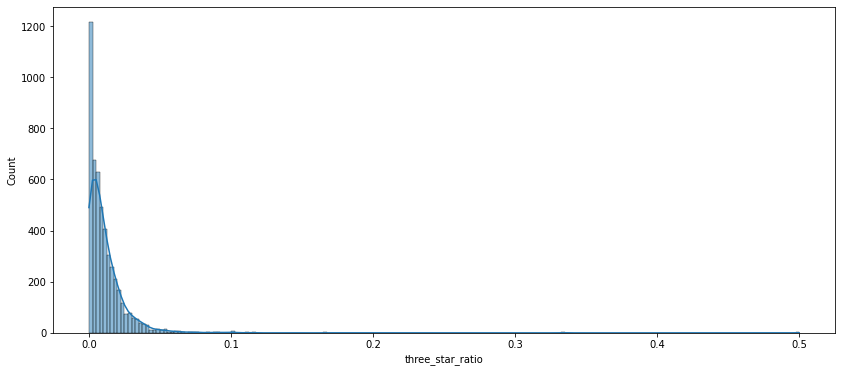

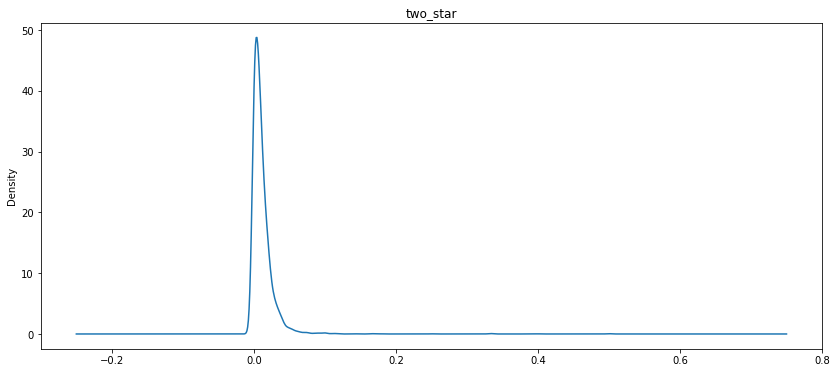

In [113]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.boxplot(data=df_tokopedia.loc[:,['three_star_ratio']]).plot(ax=ax)
plt.show()

fig, ax = plt.subplots(figsize=(14, 6))
sns.histplot(data=df_tokopedia, x='three_star_ratio',bins=200, kde=True).plot(ax=ax)
plt.show()

df_tokopedia['three_star_ratio'].plot(title='two_star', kind='density', figsize=(14,6))
plt.show()

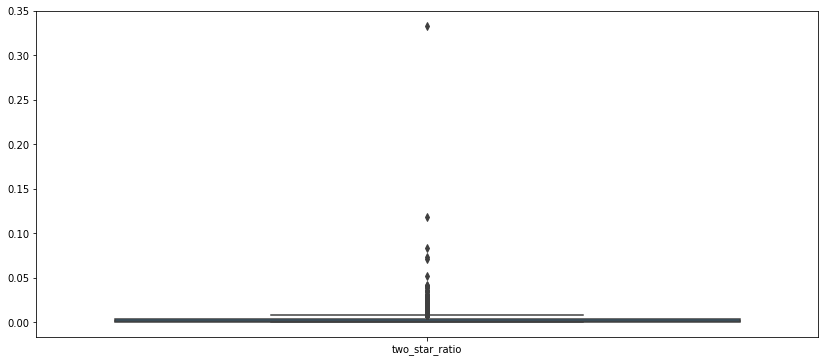

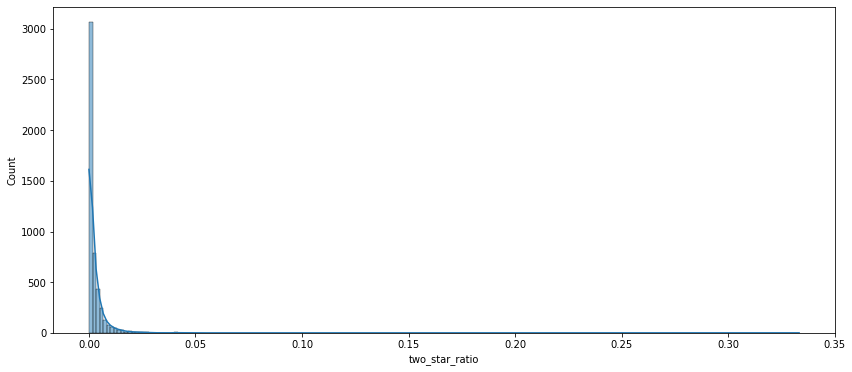

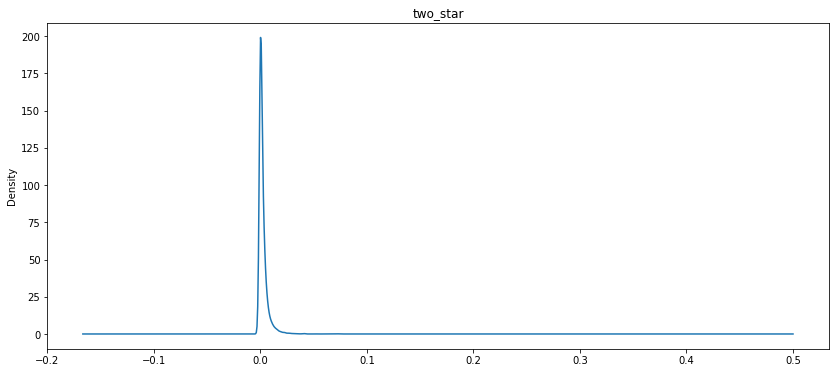

In [114]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.boxplot(data=df_tokopedia.loc[:,['two_star_ratio']]).plot(ax=ax)
plt.show()

fig, ax = plt.subplots(figsize=(14, 6))
sns.histplot(data=df_tokopedia, x='two_star_ratio',bins=200, kde=True).plot(ax=ax)
plt.show()

df_tokopedia['two_star_ratio'].plot(title='two_star', kind='density', figsize=(14,6))
plt.show()

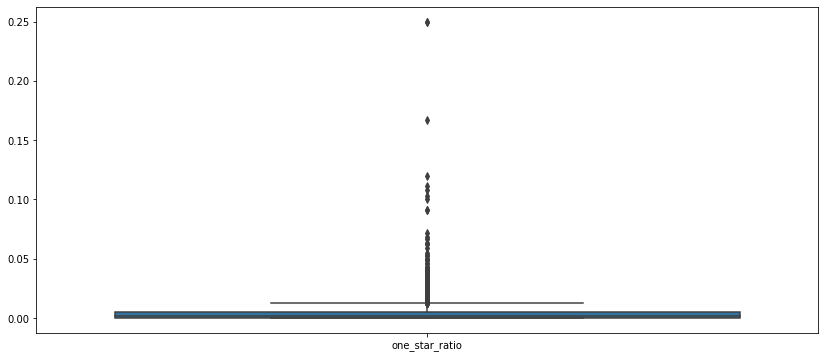

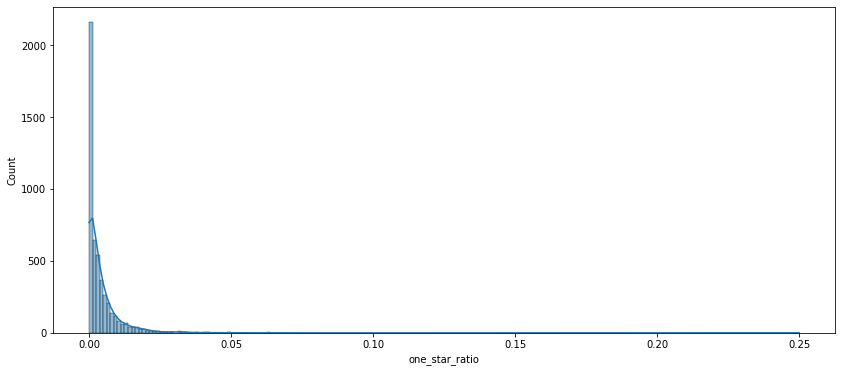

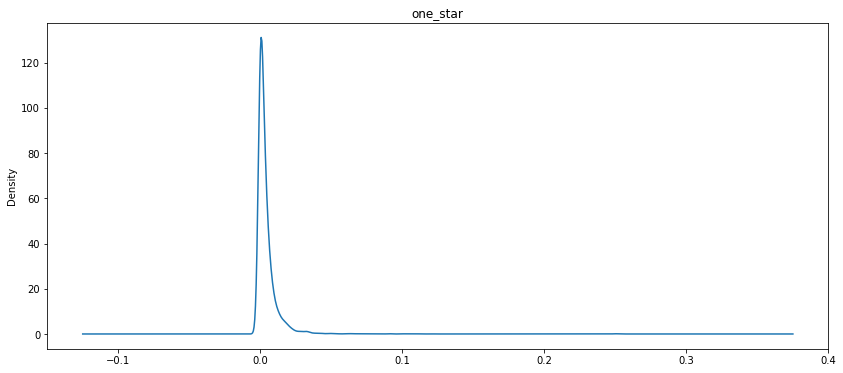

In [115]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.boxplot(data=df_tokopedia.loc[:,['one_star_ratio']]).plot(ax=ax)
plt.show()

fig, ax = plt.subplots(figsize=(14, 6))
sns.histplot(data=df_tokopedia, x='one_star_ratio',bins=200, kde=True).plot(ax=ax)
plt.show()

df_tokopedia['one_star_ratio'].plot(title='one_star', kind='density', figsize=(14,6))
plt.show()

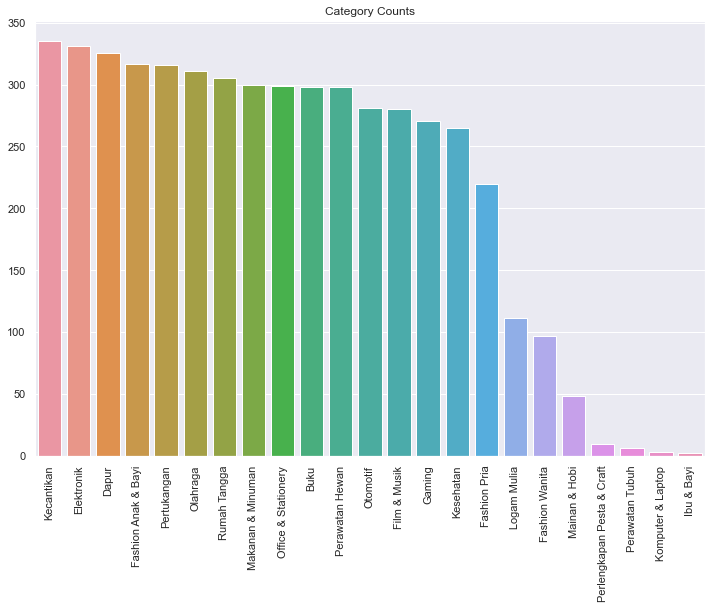

In [91]:
df_categories = df_tokopedia['category'].value_counts().sort_values(ascending=False)
sns.set(rc={'figure.figsize':(12,8)})
sns.barplot(x=df_categories.index, y=df_categories.values.tolist()).set(title='Category Counts')
plt.xticks(rotation=90)
plt.show()

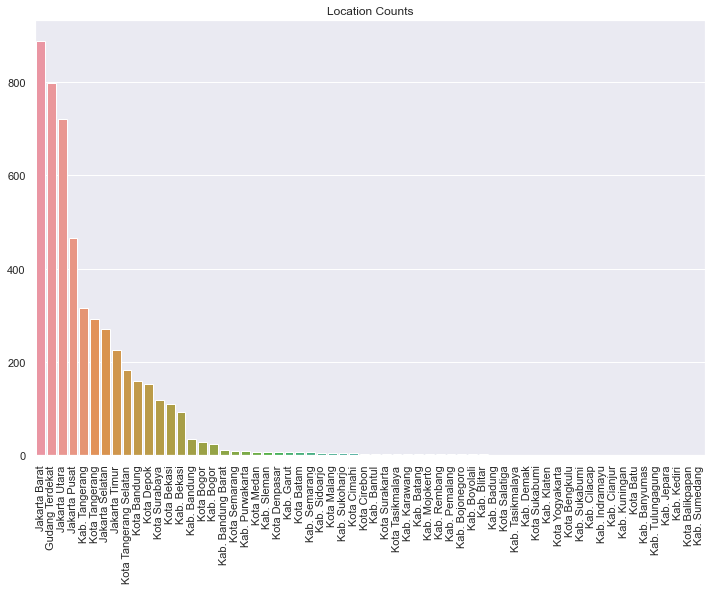

In [92]:
df_location = df_tokopedia['from_where'].value_counts().sort_values(ascending=False)
sns.set(rc={'figure.figsize':(12,8)})
plot = sns.barplot(x=df_location.index, y=df_location.values.tolist()).set(title='Location Counts')
plt.xticks(rotation=90)
plt.show()

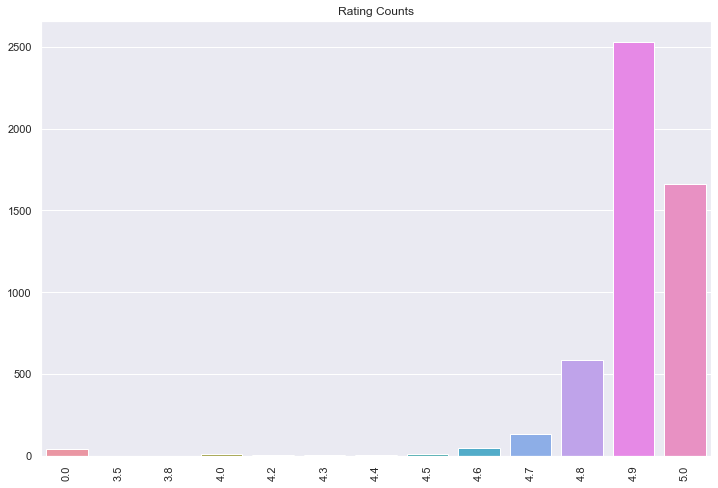

In [70]:
df_rating = df_tokopedia['rating'].value_counts().sort_values(ascending=False)
sns.set(rc={'figure.figsize':(12,8)})
sns.barplot(x=df_rating.index, y=df_rating.values.tolist()).set(title='Rating Counts')
plt.xticks(rotation=90)
plt.show()

<h2>Product Description WordCloud</h2>

In [76]:
words = []
for row in df_tokopedia.itertuples(index=True, name='Pandas'):
    for word in row.cleaned_description.split():
        words.append(word)
vec = CountVectorizer().fit(words)
bag_of_words = vec.transform(words)
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
print(words_freq[:20])

[('produk', 3896), ('kirim', 3645), ('warna', 2853), ('barang', 2685), ('bahan', 2344), ('ukur', 2218), ('cm', 2081), ('mudah', 2041), ('beli', 1922), ('sesuai', 1682), ('and', 1623), ('pakai', 1617), ('terima', 1571), ('air', 1530), ('kulit', 1495), ('pilih', 1485), ('jam', 1449), ('anak', 1440), ('isi', 1434), ('the', 1404)]


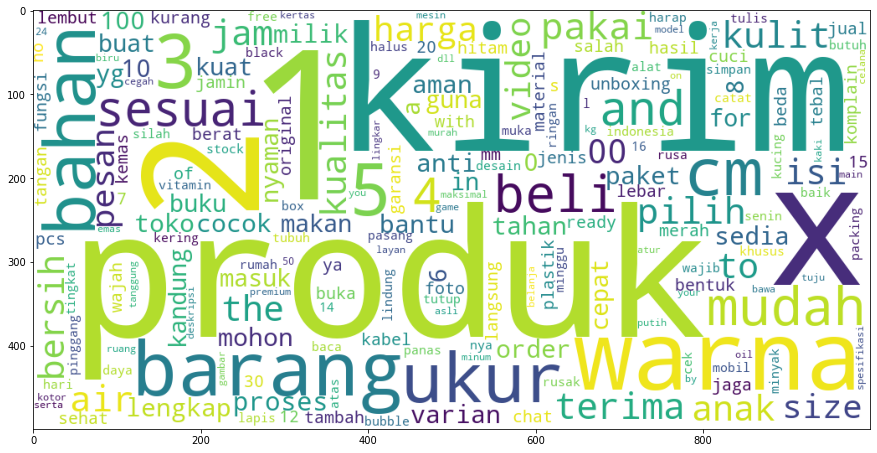

In [77]:
word_could_dict=Counter(words)
wordcloud = WordCloud(width = 1000, height = 500, background_color='white').generate_from_frequencies(word_could_dict)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)

<h2>Product Name WordCloud</h2>

In [124]:
words = []
for row in df_tokopedia.itertuples(index=True, name='Pandas'):
    for word in row.cleaned_product_name.split():
        words.append(word)
vec = CountVectorizer().fit(words)
bag_of_words = vec.transform(words)
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
print(words_freq[:20])

CountVectorizer()

[('anak', 385), ('hitam', 356), ('original', 209), ('anti', 204), ('putih', 197), ('isi', 185), ('black', 168), ('kucing', 166), ('buku', 165), ('makan', 163), ('pcs', 145), ('air', 141), ('10', 140), ('gr', 139), ('ml', 134), ('biru', 129), ('100', 129), ('alat', 126), ('set', 125), ('gitar', 124)]


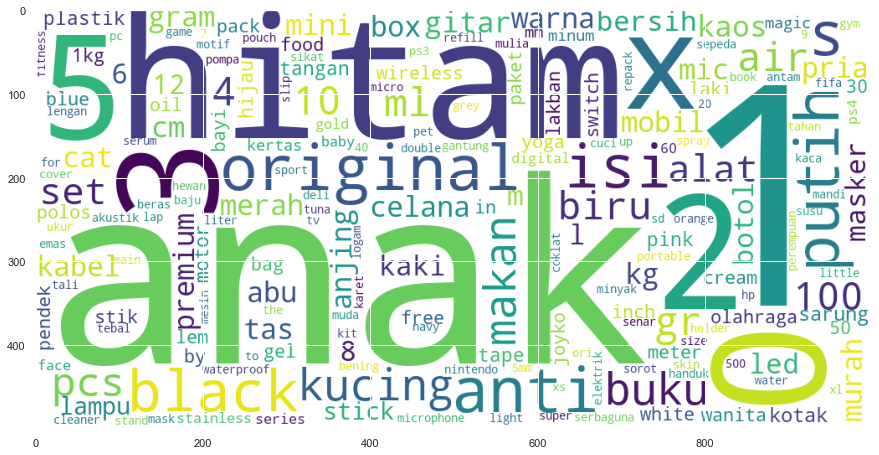

In [123]:
word_could_dict=Counter(words)
wordcloud = WordCloud(width = 1000, height = 500, background_color='white').generate_from_frequencies(word_could_dict)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)

In [9]:
cv = CountVectorizer(analyzer='word')
description_vector = cv.fit_transform(df_tokopedia['cleaned_description'])
df_description_count = pd.DataFrame(description_vector.toarray(), columns=cv.get_feature_names())
df_description_count_copy = df_description_count.copy()
df_description_count_copy

C:\Users\Kenny Jinhiro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,00000,000112informasi,000112nb,00018,00019,0002,00020,00021,...,zt102a,zte,ztto,zumba,zuzhu,zwap,zweig,zwitsal,zyrcon,zz
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5024,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5025,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5026,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5027,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_description_count_copy.info()

In [14]:
df_description_count_copy.loc[df_description_count_copy.values != 0] = 1

ValueError: too many values to unpack (expected 1)

In [131]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
# generate the frequent item set that will be use to create the rule with min_support=0.1 and max_len=4
frequent_items = apriori(df_description_count, use_colnames=True, min_support=0.1,max_len=4)

# generate the rule using lift metrics with minimum threshold=1
rules = association_rules(frequent_items, metric='lift', min_threshold=1)

# # filter the result so that we will only get the consequents Attrition_NO
# target = '{\'Attrition_No\'}'
# results_attrition_no = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)

results_attrition_no = rules[rules['consequents'].astype(str).str].sort_values(by='confidence', ascending=False)
results_attrition_no.head()

C:\Users\Kenny Jinhiro\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


ValueError: The allowed values for a DataFrame are True, False, 0, 1. Found value 5

<h4>Multivariate EDA</h4>

In [125]:
df_tokopedia_pairplot = df_tokopedia.copy()
df_tokopedia_pairplot = df_tokopedia_pairplot[['rating','satisfaction_rate_int','total_reviewers','product_score','five_star_ratio','four_star_ratio','three_star_ratio','two_star_ratio','one_star_ratio']]

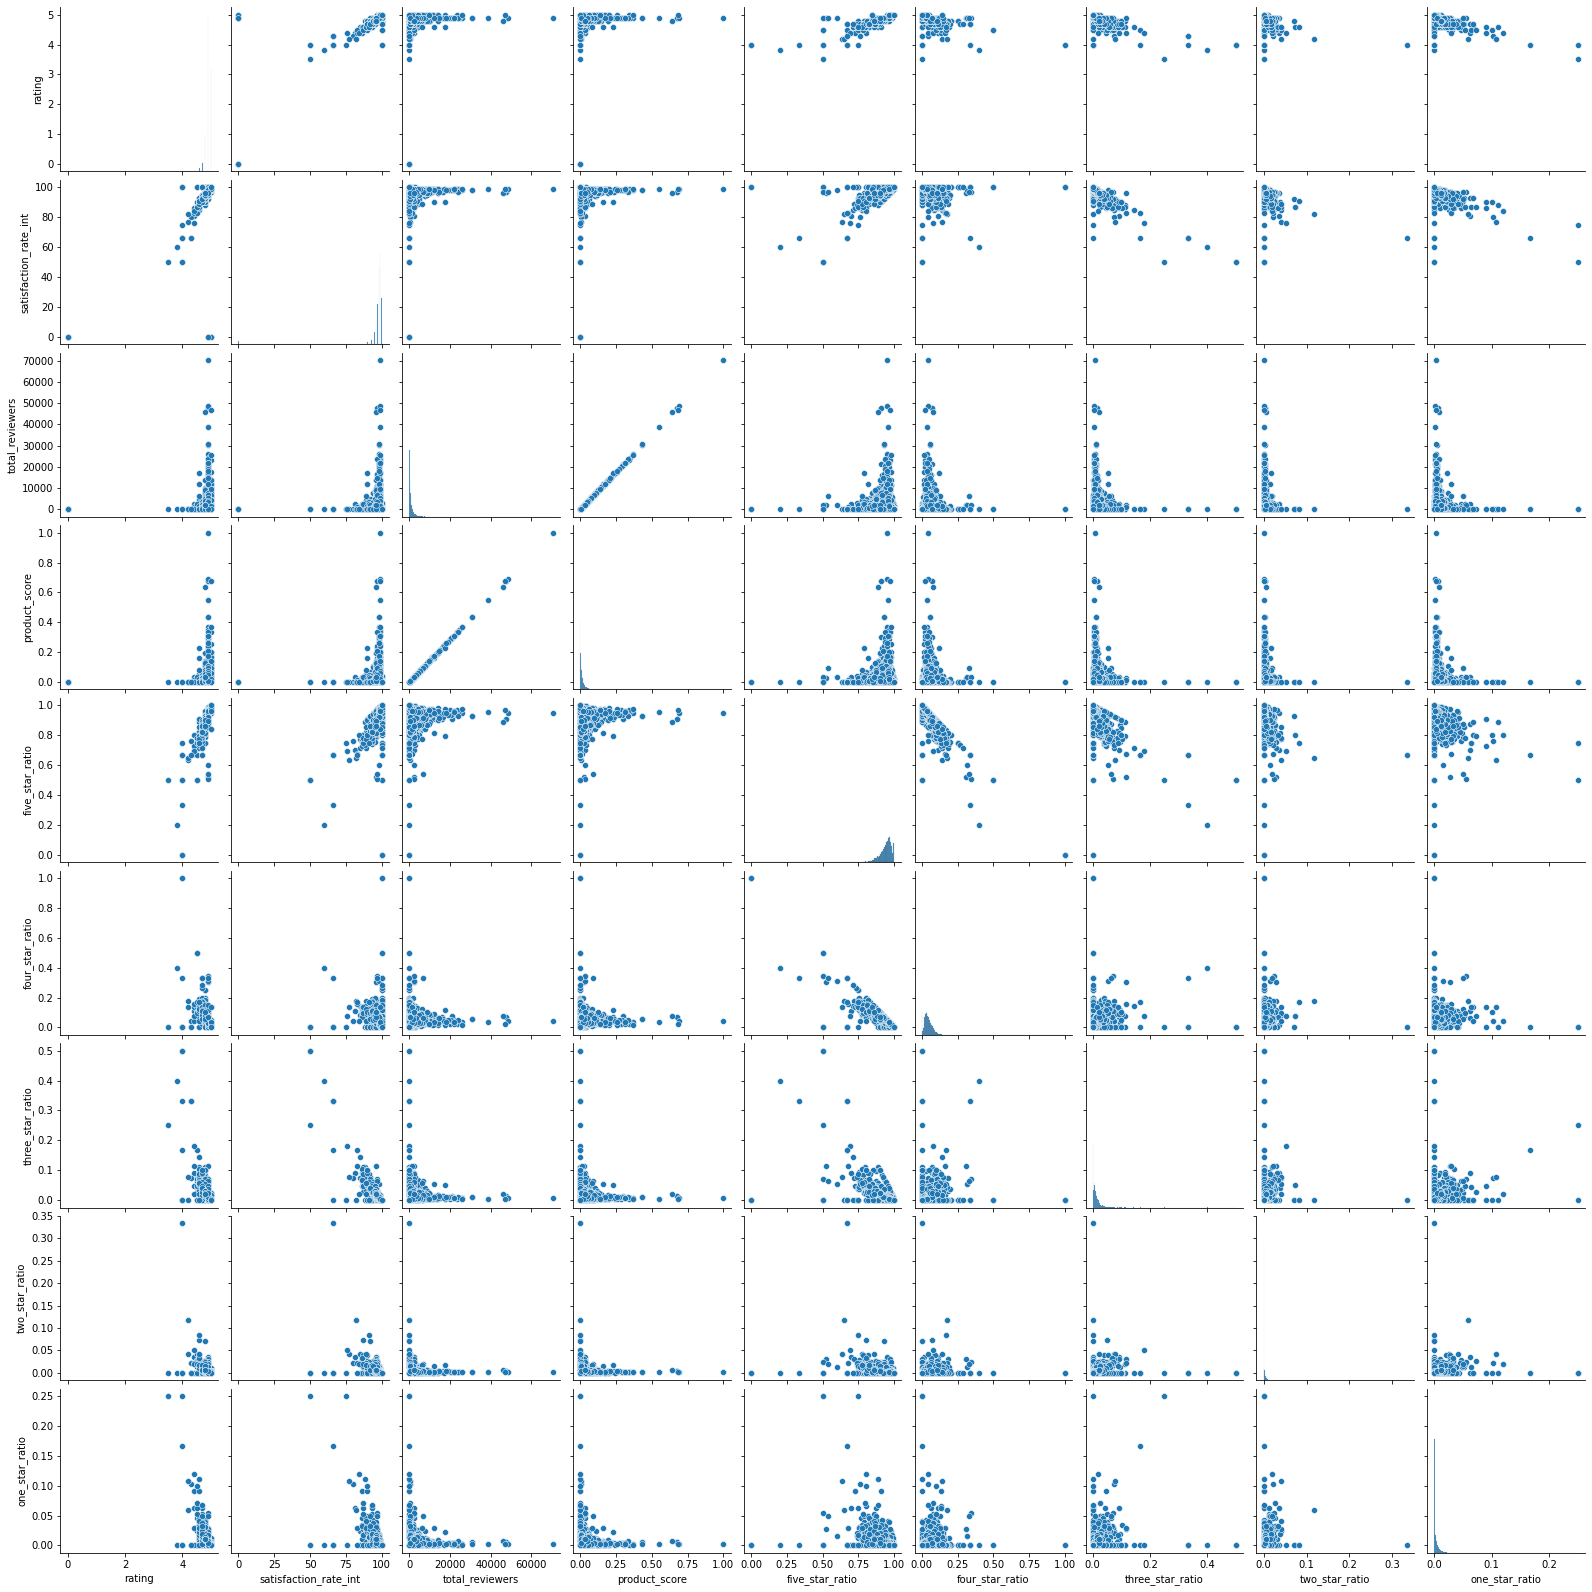

In [126]:
sns.pairplot(df_tokopedia_pairplot)

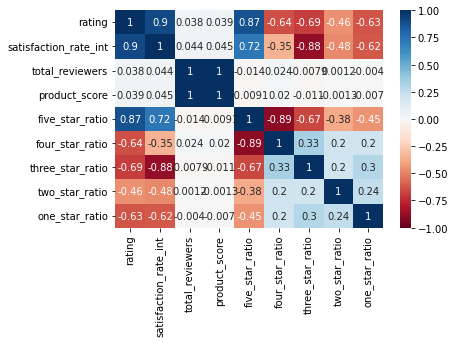

In [127]:
sns.heatmap(df_tokopedia_pairplot.corr(), vmin=-1, vmax=1, cmap="RdBu", annot=True)
plt.show()

In [109]:
df_tokopedia.to_csv('df_tokopedia_clean.csv',index=False)

<h1>Vectorize</h1>

In [3]:
df_tokopedia = pd.read_csv('df_tokopedia_clean.csv')
df_tokopedia

,product_name,rating,category,from_where,satisfaction_rate,img_link,description,amount_sold,original_price,product_price,...,product_tag,five_star_fix,satisfaction_rate_int,total_reviewers,product_score,five_star_ratio,four_star_ratio,three_star_ratio,two_star_ratio,one_star_ratio
0,Al-Quran Ash-Shahib ORI A5 - Merah,5.0,Buku,Jakarta Timur,99%,https://images.tokopedia.net/img/cache/500-squ...,PERHATIAN :- Semua buku di TOKO HARGA BUKU ORI...,Terjual 2 rb+,Rp75.000,Rp75.000,...,perhati buku toko harga buku original asli lan...,657,99,686,0.009943,0.957726,0.036443,0.005831,0.000000,0.000000
1,MASKER ANAK KF94 KOREA KIDS FACE MASK KF 94 AN...,4.9,Fashion Anak & Bayi,Jakarta Barat,99%,https://images.tokopedia.net/img/cache/500-squ...,MASKER EARLOOP KF94 ANAKSUDAH IZIN KEMENKES RI...,Terjual 10 rb+,Rp6.500,Rp5.000,...,masker earloop kf94 anaksudah izin kemenkes ri...,1621,99,1738,0.024687,0.932681,0.059839,0.005178,0.000575,0.001726
2,Otogard GOLD LINE Wiper Fluid Concentrate,4.9,Otomotif,Jakarta Selatan,97%,https://images.tokopedia.net/img/cache/500-squ...,- Cairan konsentrat yang berfungsi untuk membe...,Terjual 4 rb+,Rp72.000,Rp36.000,...,cair konsentrat fungsi bersih kaca noda kotor ...,2339,97,2546,0.036164,0.918696,0.056952,0.013354,0.001571,0.009427
3,Detick 1ml 2ml Obat Kutu Tetes Anjing Kucing 1...,4.9,Perawatan Hewan,Kab. Tangerang,98%,https://images.tokopedia.net/img/cache/500-squ...,DETICK 1ml 2ml Obat Kutu Tetes Anjing Kucing H...,Terjual 10 rb+,Rp24.000,Rp16.950,...,detick 1ml 2ml obat kutu tetes anjing kucing h...,1161,98,1259,0.017883,0.922160,0.060365,0.011914,0.000794,0.004766
4,Bebek Kloset Ekstra Kuat 450mL,4.8,Pertukangan,Gudang Terdekat,96%,https://images.tokopedia.net/img/cache/500-squ...,Bebek Kloset merupakan pembersih kloset yang m...,Terjual 5 rb+,Rp21.500,Rp18.920,...,bebek kloset bersih kloset kandung germinex bu...,1102,96,1203,0.016739,0.916043,0.047382,0.017456,0.004988,0.014131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5024,Safety Traffic Cone / Kerucut Lalu Lintas Tona...,5.0,Pertukangan,Kab. Tangerang,99%,https://images.tokopedia.net/img/cache/500-squ...,Ready Stock - Tonata Rubber Cone 1.8 KgsSpesif...,Terjual 10 rb+,Rp88.000,Rp88.000,...,ready stock tonata rubber cone 1 8 kgsspesifik...,1453,99,1510,0.021886,0.962252,0.033775,0.002649,0.000662,0.000662
5025,PAKET COD (PENTING),5.0,Buku,Kab. Bandung Barat,100%,https://images.tokopedia.net/img/cache/500-squ...,Untuk Info silahka Banyak produk yang bisa di...,Terjual 8 rb+,Rp1.000,Rp1.000,...,info silahka produk belipaket codkategori-buku...,29,100,29,0.000420,1.000000,0.000000,0.000000,0.000000,0.000000
5026,Game Boy Retro FC 400 in 1 Gameboy Mini Gamepa...,4.8,Gaming,Kota Tangerang,95%,https://images.tokopedia.net/img/cache/500-squ...,Link Gameboy + Stick : https://www.tokopedia.c...,Terjual 10 rb+,Rp72.500,Rp72.500,...,link gameboy stick stick nya 5 warna hitem mer...,1654,95,1835,0.025533,0.901362,0.056676,0.025068,0.005450,0.011444
5027,SENDOK TEH ISI 12 PCS - STAINLESS STEEL,4.9,Dapur,Jakarta Barat,96%,https://images.tokopedia.net/img/cache/500-squ...,SENDOK TEH ISI 12 PCS Panjang 14cmSTAINLESS STEEL,Terjual 1 rb+,Rp8.000,Rp8.000,...,sendok teh isi 12 pcs 14cmstainless steelsendo...,229,96,255,0.003622,0.898039,0.070588,0.023529,0.003922,0.003922


In [71]:
df_tokopedia.dropna(inplace=True)
df_tokopedia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5029 entries, 0 to 5028
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_name           5029 non-null   object 
 1   rating                 5029 non-null   float64
 2   category               5029 non-null   object 
 3   from_where             5029 non-null   object 
 4   satisfaction_rate      5029 non-null   object 
 5   img_link               5029 non-null   object 
 6   description            5029 non-null   object 
 7   amount_sold            5029 non-null   object 
 8   original_price         5029 non-null   object 
 9   product_price          5029 non-null   object 
 10  five_star              5029 non-null   object 
 11  four_star              5029 non-null   int64  
 12  three_star             5029 non-null   int64  
 13  two_star               5029 non-null   int64  
 14  one_star               5029 non-null   int64  
 15  clea

In [107]:
def recommend_cosine(product_name):
    tfidf_vectorizer = TfidfVectorizer()
    product_index = df_tokopedia[df_tokopedia['product_name'] == product_name].index[0]

    tfidf_product_tag_vector = tfidf_vectorizer.fit_transform(df_tokopedia['product_tag'])
    product_tag_query = df_tokopedia.iloc[[product_index]]['product_tag'][product_index]
    product_query_vector = tfidf_vectorizer.transform([product_tag_query])

    product_similarity = cosine_similarity(product_query_vector, tfidf_product_tag_vector).flatten()
    # print(product_similarity[product_index])
    product_indices = np.argpartition(product_similarity, -6)[-6:]
    # print(product_indices)
    df_product_results = df_tokopedia[0:0]
    for i, index in enumerate(product_indices):
        df_product_results = df_product_results.append(df_tokopedia.iloc[index])
        df_product_results.loc[df_product_results.index[i], 'similarity'] = product_similarity[index]

    # df_product_results['similarity'][index] = product_similarity[index]
    return df_product_results.sort_values(by='similarity',ascending=False).iloc[1:]

In [118]:
recommendation_cosine = recommend_cosine('Binder Note Joyko B5-MHPT-143 - Blue')
display(recommendation_cosine)

C:\Users\Kenny Jinhiro\AppData\Local\Temp\ipykernel_19168\2756796431.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_product_results = df_product_results.append(df_tokopedia.iloc[index])
C:\Users\Kenny Jinhiro\AppData\Local\Temp\ipykernel_19168\2756796431.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_product_results = df_product_results.append(df_tokopedia.iloc[index])
C:\Users\Kenny Jinhiro\AppData\Local\Temp\ipykernel_19168\2756796431.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_product_results = df_product_results.append(df_tokopedia.iloc[index])
C:\Users\Kenny Jinhiro\AppData\Local\Temp\ipykernel_19168\2756796431.py:15: FutureWarning: The frame.append method is deprecated and will be removed

,product_name,rating,category,from_where,satisfaction_rate,img_link,description,amount_sold,original_price,product_price,...,five_star_fix,satisfaction_rate_int,total_reviewers,product_score,five_star_ratio,four_star_ratio,three_star_ratio,two_star_ratio,one_star_ratio,similarity
1293,Loose Leaf Color Isi Kertas File Binder Warna ...,4.9,Office & Stationery,Jakarta Utara,98%,https://images.tokopedia.net/img/cache/500-squ...,Loose Leaf Color Isi Kertas File Binder Warna ...,Terjual 3 rb+,Rp11.100,Rp11.100,...,780,98,816,0.011591,0.955882,0.025735,0.011029,0.002451,0.004902,0.463628
2419,Binder Note Joyko A5-TSPL-M507 - Brown,4.9,Office & Stationery,Jakarta Utara,97%,https://images.tokopedia.net/img/cache/500-squ...,Binder Note Joyko A5-TSPL-M507>Product Size ( ...,Terjual 4 rb+,Rp20.600,Rp20.600,...,1183,97,1297,0.018423,0.912105,0.063994,0.015420,0.004626,0.003855,0.398188
4013,Binder Note A5 Pastel Joyko - MHPTSM-517 - Hijau,4.9,Office & Stationery,Kota Bandung,99%,https://images.tokopedia.net/img/cache/500-squ...,Deskripsi Binder Note Joyko A5-MHPTSM-517MOHON...,Terjual 1 rb+,Rp16.500,Rp16.500,...,493,99,516,0.007329,0.955426,0.038760,0.005814,0.000000,0.000000,0.392772
4382,Deli kertas binder file Loose leaf ukuran B5 i...,4.8,Office & Stationery,Kab. Tangerang,96%,https://images.tokopedia.net/img/cache/500-squ...,Deli kertas binder file Loose leaf ukuran B5 i...,Terjual 3 rb+,Rp29.000,Rp29.000,...,1040,96,1151,0.016015,0.903562,0.063423,0.019114,0.006950,0.006950,0.385420
1307,"Loose Leaf Big Boss B5 , 20 Holes - Polos isi ...",4.9,Office & Stationery,Kota Bandung,98%,https://images.tokopedia.net/img/cache/500-squ...,"Kami hanya menjual barang ORIGINAL, BERKUALITA...",Terjual 1 rb+,Rp9.500,Rp9.500,...,283,98,297,0.004219,0.952862,0.037037,0.006734,0.000000,0.003367,0.372810


In [20]:
def recommend_product(product_query):
    tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,len(product_query)))
    # product_index = df_tokopedia[df_tokopedia['product_name'] == product_name].index[0]

    tfidf_product_tag_vector = tfidf_vectorizer.fit_transform(df_tokopedia['product_tag'])
    # product_tag_query = df_tokopedia.iloc[[product_index]]['product_tag'][product_index]
    product_query_vector = tfidf_vectorizer.transform([product_query])

    # product_similarity = cosine_similarity(product_query_vector, tfidf_product_tag_vector).flatten()
    product_similarity = cosine_similarity(tfidf_product_tag_vector, product_query_vector).flatten()
    # print(product_similarity[product_index])
    product_indices = np.argpartition(product_similarity, -20)[-20:]
    # print(product_indices)
    df_product_results = df_tokopedia[0:0]
    for i, index in enumerate(product_indices):
        df_product_results = df_product_results.append(df_tokopedia.iloc[index])
        df_product_results.loc[df_product_results.index[i], 'similarity'] = product_similarity[index]

    # df_product_results['similarity'][index] = product_similarity[index]
    # return df_product_results.sort_values(by='similarity',ascending=False).iloc[1:]
    return df_product_results.sort_values(by='similarity',ascending=False)

In [22]:
recommend_product('face moisturizer')

C:\Users\Kenny Jinhiro\AppData\Local\Temp\ipykernel_23204\703741790.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_product_results = df_product_results.append(df_tokopedia.iloc[index])
C:\Users\Kenny Jinhiro\AppData\Local\Temp\ipykernel_23204\703741790.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_product_results = df_product_results.append(df_tokopedia.iloc[index])
C:\Users\Kenny Jinhiro\AppData\Local\Temp\ipykernel_23204\703741790.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_product_results = df_product_results.append(df_tokopedia.iloc[index])
C:\Users\Kenny Jinhiro\AppData\Local\Temp\ipykernel_23204\703741790.py:16: FutureWarning: The frame.append method is deprecated and will be removed fro

,product_name,rating,category,from_where,satisfaction_rate,img_link,description,amount_sold,original_price,product_price,...,five_star_fix,satisfaction_rate_int,total_reviewers,product_score,five_star_ratio,four_star_ratio,three_star_ratio,two_star_ratio,one_star_ratio,similarity
1584,PONDS Men Bright Boost Face Moisturizer 20Ml,4.9,Kecantikan,Gudang Terdekat,99%,https://images.tokopedia.net/img/cache/500-squ...,NOTE : Kemungkinan Anda akan menerima kemasan ...,Terjual 3 rb+,Rp43.020,Rp33.321,...,1212,99,1260,0.017897,0.961905,0.029365,0.006349,0.000000,0.002381,0.104794
2944,PONDS Juice Collection Moisturizer Watermelon ...,5.0,Kecantikan,Gudang Terdekat,99%,https://images.tokopedia.net/img/cache/500-squ...,NOTE : Kemungkinan Anda akan menerima kemasan ...,Terjual 4 rb+,Rp34.560,Rp24.950,...,1452,99,1514,0.021944,0.959049,0.033686,0.006605,0.000000,0.000661,0.062836
790,Baybie's Topi Bucket Face Shield Baby / Topi M...,4.9,Fashion Anak & Bayi,Jakarta Barat,98%,https://images.tokopedia.net/img/cache/500-squ...,Topi dan Face Shield Baby Cek motif lainnya di...,Terjual 1 rb+,Rp100.000,Rp73.900,...,604,98,631,0.008963,0.957211,0.026941,0.014263,0.000000,0.001585,0.037428
2737,My Skin Hero - Glowing Skin Set,5.0,Perawatan Tubuh,Kab. Tangerang,100%,https://images.tokopedia.net/img/cache/500-squ...,PERFECT SKIN SET✔ Lemon Caviar Juice Cleanser ...,Terjual 25,Rp367.000,Rp220.200,...,16,100,16,0.000232,1.000000,0.000000,0.000000,0.000000,0.000000,0.034521
1092,My Skin Hero - Acne Care Set,5.0,Perawatan Tubuh,Kab. Tangerang,100%,https://images.tokopedia.net/img/cache/500-squ...,ACNE CARE SET✔ Lemon Caviar Juice Cleanser (12...,Terjual 6,Rp367.000,Rp220.200,...,2,100,2,0.000029,1.000000,0.000000,0.000000,0.000000,0.000000,0.034466
4933,Retinol + Blueberry Extract Face Serum 32ml,5.0,Kecantikan,Gudang Terdekat,99%,https://images.tokopedia.net/img/cache/500-squ...,Face Serum Retinol+ Blueberry ExtractSerum den...,Terjual 3 rb+,Rp189.000,Rp75.600,...,812,99,840,0.012175,0.966667,0.026190,0.003571,0.002381,0.001190,0.032168
2488,PIGEON Teens Moisturizer For All Skin Types 50ml,5.0,Kecantikan,Jakarta Timur,99%,https://images.tokopedia.net/img/cache/500-squ...,PIGEON Teens Moisturizer For All Skin Types 50...,Terjual 1 rb+,Rp40.000,Rp33.000,...,781,99,814,0.011798,0.959459,0.035627,0.003686,0.000000,0.001229,0.031027
2788,PIGEON Moisturizer For All Skin Types 20Ml / P...,4.9,Kecantikan,Jakarta Timur,99%,https://images.tokopedia.net/img/cache/500-squ...,PIGEON Moisturizer For All Skin Types 20ml Pel...,Terjual 3 rb+,Rp20.000,Rp18.000,...,1386,99,1456,0.020681,0.951923,0.038462,0.007555,0.000687,0.001374,0.030296
1738,10% Niacinamide + Watermelon Extract Face Seru...,4.9,Kecantikan,Gudang Terdekat,98%,https://images.tokopedia.net/img/cache/500-squ...,Face Serum 10% Niacinamide + Watermelon Extrac...,Terjual 3 rb+,Rp69.000,Rp27.600,...,1259,98,1351,0.019190,0.931902,0.054034,0.012583,0.000000,0.001480,0.028664
3185,Snorkel alat snorkling kacamata selam Full Fac...,4.9,Olahraga,Gudang Terdekat,98%,https://images.tokopedia.net/img/cache/500-squ...,proses order sesuai varian yg dipilih saat ord...,Terjual 3 rb+,Rp95.000,Rp95.000,...,1336,98,1440,0.020454,0.927778,0.059028,0.007639,0.001389,0.004167,0.028184
